In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
dataframe = pd.read_csv("./vaccination_tweets.csv")
dataframe.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [8]:
from datetime import date
dataframe['today']=date.today()
dataframe['user_created']=pd.to_datetime(dataframe['user_created']).dt.year
dataframe['today']=pd.to_datetime(dataframe['today'])
dataframe['today']=dataframe['today'].dt.year
dataframe['acc_age']= dataframe['today']-dataframe['user_created']
dataframe['date']=pd.to_datetime(dataframe['date'])
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
dataframe = dataframe.join(pd.concat((getattr(dataframe['date'].dt, i).rename(i) for i in L), axis=1))

C:\Users\willk\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [9]:
dataframe[["first_loc", "second_loc"]] = dataframe["user_location"].str.split(',', expand=True)[[0,1]]
dataframe['second_loc'] = dataframe['second_loc'].str.strip()
state_fix = {
    'Ontario': 'Canada',
    'United Arab Emirates': 'UAE',
    'TX': 'USA',
    'NY': 'USA',
    'FL': 'USA',
    'England': 'UK',
    'Watford': 'UK',
    'GA': 'USA',
    'IL': 'USA',
    'Alberta': 'Canada',
    'WA': 'USA',
    'NC': 'USA',
    'British Columbia': 'Canada',
    'MA': 'USA',
    'ON':'Canada',
    'OH':'USA',
    'MO':'USA',
    'AZ':'USA',
    'NJ':'USA',
    'CA':'USA',
    'DC':'USA',
    'AB':'USA',
    'PA':'USA',
    'SC':'USA',
    'VA':'USA',
    'TN':'USA',
    'New York':'USA',
    'Dubai':'UAE',
    'CO':'USA',
    'BC - Canada': 'CA',
    np.nan: None
  }
dataframe = dataframe.replace({"second_loc": state_fix})
dataframe['second_loc'].value_counts()[:40]

USA                        860
UK                         540
Canada                     183
India                      178
Ireland                     90
UAE                         77
United Kingdom              75
Germany                     61
Belgium                     26
France                      24
South Africa                23
Scotland                    22
Pakistan                    19
London                      17
Qatar                       17
MI                          16
Malaysia                    16
New South Wales             16
Deutschland                 16
Australia                   15
a spot in this Universe     14
Nederland                   14
Switzerland                 14
Spain                       12
California                  11
Italy                       11
Greece                      10
Wales                       10
Philippines                 10
Turkey                       9
Queensland                   9
BC                           9
CT      

In [10]:
dataframe['acc_class'] = dataframe['user_followers'].apply(
    lambda x:'weak'if x<=100 else ('norm' if 1000>=x>100 else ('strong' if 10000>=x>1000 else 'influencer')))
dataframe.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,year,month,day,dayofweek,dayofyear,weekofyear,quarter,first_loc,second_loc,acc_class
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009,405,1692,3247,False,2020-12-20 06:06:44,...,2020,12,20,6,355,51,4,La Crescenta-Montrose,USA,norm
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009,834,666,178,False,2020-12-13 16:27:13,...,2020,12,13,6,348,50,4,San Francisco,USA,norm
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020,10,88,155,False,2020-12-12 20:33:45,...,2020,12,12,5,347,50,4,Your Bed,None,weak
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008,49165,3933,21853,True,2020-12-12 20:23:59,...,2020,12,12,5,347,50,4,Vancouver,CA,influencer
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020,152,580,1473,False,2020-12-12 20:17:19,...,2020,12,12,5,347,50,4,NaN,None,norm


In [12]:
import re
from nltk.stem.snowball import SnowballStemmer
from textblob import TextBlob

s_stemmer = SnowballStemmer(language='english')

def pre_process(tweet: str):
    # Remover links
    tweet = re.sub('(https?://\S+)', '', tweet)

    # Remover Hashtags
    tweet = re.sub(r'#\w+', '', tweet)

    # Remover menções
    tweet = re.sub('@\w+', '', tweet)

    # Remover caracteres sozinhos
    tweet= re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)

    # Remover caracteres sozinhos no inicio
    tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet) 

    # Trocar multiplos espaços para um espaço
    tweet = re.sub(r'\s+', ' ', tweet)

    # Remover prefixo b
    tweet = re.sub(r'^b\s+', '', tweet)

    # Tudo para lowercase
    tweet = tweet.lower()

    return tweet

def spell_check(tweet):
    #Corrigir as palavras pela primeira vez
    tweet = str(TextBlob(tweet).correct())

    #Aplicar o radical das palavras
    tweet = s_stemmer.stem(tweet)

    tweet = str(TextBlob(tweet).correct())
    return tweet

dataframe['corrected_tweet'] = dataframe['text'].apply(pre_process).apply(spell_check)


In [15]:
dataframe.to_csv('vaccination_tweet_preprocessed.csv')

In [2]:
dataframe = pd.read_csv("./vaccination_tweet_preprocessed.csv")

In [6]:
from textblob import TextBlob
from wordcloud import WordCloud
dataframe['subjectivity'] = dataframe['corrected_tweet'].apply(lambda t: TextBlob(t).sentiment.subjectivity)
dataframe['polarity'] = dataframe['corrected_tweet'].apply(lambda t: TextBlob(t).sentiment.polarity)

In [42]:
dataframe['corrected_tweet'].apply(len).describe() # Média 77

dataframe['tweet_length'] = dataframe['corrected_tweet'].apply(lambda x:'short' if len(x)<=77 else 'long')
def categorize_polarity(score):
  if score < 0:
    return -1.0
  elif score == 0:
    return 0.0
  else:
    return 1.0

dataframe['sentiment'] = dataframe['polarity'].apply(categorize_polarity)

dataframe.head()

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,...,weekofyear,quarter,first_loc,second_loc,acc_class,corrected_tweet,subjectivity,polarity,tweet_length,sentiment
0,0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009,405,1692,3247,False,...,51,4,La Crescenta-Montrose,USA,norm,same folks said maison paste could treat cytok...,0.125000,0.00,short,0.0
1,1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009,834,666,178,False,...,50,4,San Francisco,USA,norm,while the world has been on the wrong side of ...,0.900000,-0.50,long,-1.0
2,2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020,10,88,155,False,...,50,4,Your Bed,NaN,weak,russian vaccine is created to last 2-4 years…,0.033333,0.00,short,0.0
3,3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008,49165,3933,21853,True,...,50,4,Vancouver,CA,influencer,"facts are immutable, senator, even when you're...",0.550000,-0.05,long,-1.0
4,4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020,152,580,1473,False,...,50,4,NaN,NaN,norm,explain to me again why we need vaccine …,0.000000,0.00,short,0.0


In [50]:
dataframe.corr()

,Unnamed: 0,id,user_created,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,is_retweet,...,year,month,day,dayofweek,dayofyear,weekofyear,quarter,subjectivity,polarity,sentiment
Unnamed: 0,1.000000,0.973923,-0.041226,-0.041206,0.006171,0.036113,-0.082679,-0.028901,-0.037946,NaN,...,0.745479,-0.613092,-0.033913,0.001883,-0.606747,-0.650777,-0.669962,0.024966,0.015025,0.007244
id,0.973923,1.000000,-0.044316,-0.034975,0.009308,0.044473,-0.067415,-0.028734,-0.036239,NaN,...,0.638477,-0.480448,-0.049275,-0.010340,-0.478101,-0.521624,-0.539506,0.019489,0.013411,0.006999
user_created,-0.041226,-0.044316,1.000000,-0.116745,-0.107010,-0.101919,-0.181924,-0.043427,-0.039923,NaN,...,-0.020562,0.009989,0.040322,0.018148,0.012382,0.014146,0.013563,0.008266,0.002993,-0.006365
user_followers,-0.041206,-0.034975,-0.116745,1.000000,-0.017575,-0.028418,0.347264,0.079400,0.050721,NaN,...,-0.058978,0.059008,0.012278,0.000164,0.058682,0.067684,0.056475,-0.004916,-0.011196,0.011226
user_friends,0.006171,0.009308,-0.107010,-0.017575,1.000000,0.212469,-0.028040,0.021330,0.015121,NaN,...,0.003249,-0.002922,0.025485,-0.017151,-0.001398,-0.004033,-0.004778,-0.003090,0.005349,-0.000935
user_favourites,0.036113,0.044473,-0.101919,-0.028418,0.212469,1.000000,-0.059618,0.011346,0.007171,NaN,...,0.019159,-0.009250,-0.024420,0.005503,-0.010765,-0.015510,-0.014089,-0.024341,-0.029776,-0.025095
user_verified,-0.082679,-0.067415,-0.181924,0.347264,-0.028040,-0.059618,1.000000,0.148012,0.119028,NaN,...,-0.113070,0.113939,0.006625,-0.002708,0.112291,0.105456,0.110973,-0.023345,-0.017830,0.017230
retweets,-0.028901,-0.028734,-0.043427,0.079400,0.021330,0.011346,0.148012,1.000000,0.612882,NaN,...,-0.019346,0.014901,0.002180,0.012858,0.014882,0.010542,0.016579,-0.009718,-0.004042,-0.013738
favorites,-0.037946,-0.036239,-0.039923,0.050721,0.015121,0.007171,0.119028,0.612882,1.000000,NaN,...,-0.027077,0.022658,-0.008844,-0.002910,0.021802,0.017001,0.024329,0.003817,0.013279,0.004003
is_retweet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='sentiment', ylabel='Count'>

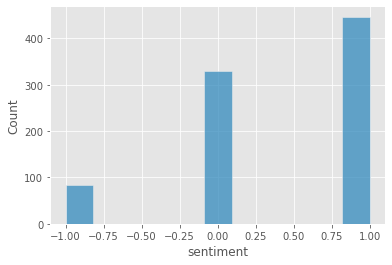

In [43]:
dfCountries = dataframe.filter(items=['second_loc', 'subjectivity', 'sentiment'])

dfUSA = dfCountries.query("second_loc == 'USA'")

sns.histplot(data = dfUSA, x = "sentiment")

In [52]:
dfUSAneg = dfUSA.query("sentiment == -1")


AttributeError: 'DataFrame' object has no attribute 'avg'